<br>
<font size=6>Statistics</font>
<br>
<br>
Каждому знакомо это слово, но не зря же придумали определение<br>
<br>
<b>Стати́стика</b> — отрасль знаний, наука, в которой излагаются общие вопросы сбора, измерения, мониторинга, анализа массовых статистических (количественных или качественных) данных и их сравнение; изучение количественной стороны массовых общественных явлений в числовой форме<br>
   <ul>
     <li>Рассчитать численность населения - статистика</li>
     <li>Сколько потратить денег на бесконечные праздники - статистика</li>
     <li>Сколько купить кг шашлыка на вечер - статистика</li>
   </ul>
Если у вас есть данные и вы хотите получить от них пользу - вы статистик:)<br>

<b>Более нормальное описание статистики</b>:

<b>Статистика</b> опирается на математику и приемы, с помощью которых мы проникаем в сущность данных. Она представляет собой богатую и обширную область знаний, для которой больше подошла бы книжная полка или целая комната в библиотеке, а не глава в книге, поэтому наше изложение, конечно же, будет кратким. Тем не менее представленного в этой главе материала вам будет достаточно для 
того, чтобы стать опасным человеком, и пробудить в вас интерес к самостоятельному изучению статистики.<br><br>
   
МАТЕРИАЛЫ ЗАНЯТИЯ:
- курс занятий по статистике на сайте mathprofi: http://mathprofi.ru/matematicheskaya_statistika.html
- Книга "Data Science наука о данных с нуля", Джоэл Грас, 2е издание.<br><br>


<br>
- <b>Качественная, дискретная, или категориальная переменная</b> — переменная, которая может принимать одно из ограниченного и обычно фиксированного числа возможных значений, например, переменная "первый" или "кассир" являются качественными переменными,<br>
- "первый" - означает в наших данных, что человек первый раз берет кредит.<br>
- "кассир" - профессия человека. <br>
Такие данные обычно кодируются числами<br>
<br>
- <b>Колличественные данные или числовые</b> - данные, которые представлены числами.<br>
- 32000 - зарплата <br>
- 25 - возраст
<br>
<br>

Text(0.5, 1.0, 'Количество приглашений')

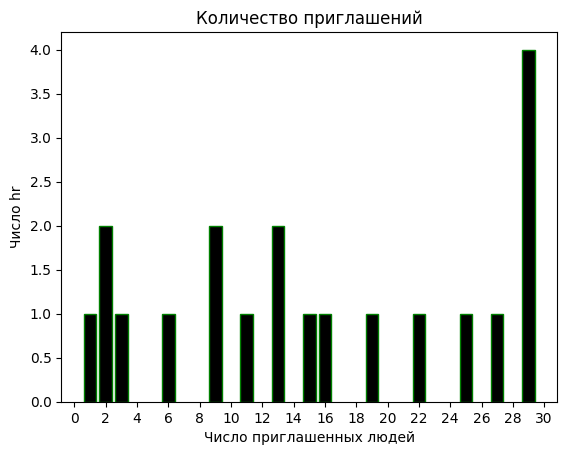

In [38]:
# Сколько hr'ы в нашей компании пригласили людей
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

invite_people = [np.random.randint(0, 30) for i in range(20)] # Создаем список сколько людей пригласил каждый hr

people_counter = Counter(invite_people)
xs = [num_people for num_people in people_counter]
ys = [people_counter[num_people] for num_people in people_counter]
plt.bar(xs, ys, color='black', edgecolor='green')
plt.xticks([2 * i for i in range(16)])
plt.xlabel('Число приглашенных людей')
plt.ylabel('Число hr')
plt.title('Количество приглашений')

<br>
Хорошо, есть диаграмма, которая покажет нам как hr отработали свой день.<br>
Но график нужно либо распечатать, либо таскать за собой ноутбук.<br>
Почему бы нам не собрать некоторую статистику и хвалиться перед всеми числами.
<br>
<br>


1)Самым простым показателем является число точек данных:


In [42]:
num_points = len(invite_people)
print('Кол-во точек: ', num_points) # Интерпретируется, как кол-во hr в нашей команде

Кол-во точек:  20


2) Наибольшие и наименьшие значения:

In [47]:
largest_value = max(invite_people)
smallest_value = min(invite_people)
print('Наибольшее число приглашенных людей: ', largest_value)
print('Наименьшее число приглашенных людей: ', smallest_value)

Наибольшее число приглашенных людей:  29
Наименьшее число приглашенных людей:  1


In [51]:
sorted_values = sorted(list(set(invite_people))) # избавляемся от повторяющихся значений
print(f'Второй минимум: {sorted_values[1]}')
print(f'Второй максимум: {sorted_values[-2]}')

Второй минимум: 2
Второй максимум: 27


<br>
<br>
<font size=5>Центральные тенденции</font>
<br>
<br>
<br>
Обычно мы хотим иметь некое представление о том, где наши данные центрированы.<br>
Чаще всего для этих целей используется среднее (или среднее арифметическое) <br>
значение, которое берется как сумма данных, деленная на их количество<br>

<br>
<font size=4>Среднее число</font>
<br>
<br>

In [55]:
def mean(xs: list[float]) -> float:
    return sum(xs) / len(xs)

print(f'Среднее кол-во приглашенных людей: {mean(invite_people)}')

Среднее кол-во приглашенных людей: 15.45


<br>
<font size=4>Медиана</font>
<br>
<br>
<b>Медиана</b> - ближайшее к центру значение<br>
Медиана в отличе от среднего - не зависит от каждого значения в наборе данных.
Например, если сделать наибольшую точку еще больше(или наименьшую еще меньше), то
срединные точки останутся неизменными, следовательно, и медиана тоже не изменится
  

In [71]:
def _median_odd(xs: list[float]) -> float: 
    """Если len(xs) является нечетной, 
    то медиана - это срединный элемент""" 
    return sorted(xs) [len(xs) // 2] 

def _median_even(xs: list[float]) -> float: 
    """Если len(xs) является четной, то она является средним значением 
    двух срединных элементов""" 
    sorted_xs = sorted(xs) 
    hi_midpoint = len(xs) // 2 #напр. длина 4 => hi_midpoint 2 
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2 

def median(v: list[float]) -> float: 
    """Отыскивает 'ближайшее к середине' значение v""" 
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5 
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [74]:
median = median(sorted(invite_people))
print(f'Центральное число приглашений: {median}')

Центральное число приглашений: 14.0
